# Carga de datos y preparación de rutas

En esta celda importo las librerías necesarias, defino las rutas del proyecto y cargo el dataset principal dataset_ready.csv.
Además, creo la carpeta outputs/figuras/ (si no existe) para asegurar la exportación de las figuras más adelante.
Tras la carga, muestro dimensiones y una vista rápida de las primeras filas para verificar que la lectura es correcta y que existe la columna País, imprescindible para comparar las variables clínicas por país.

In [7]:
# === Celda 1: Carga de datos (versión final) ===
from pathlib import Path
import pandas as pd

# Ruta fija al dataset
DATA = Path(r"C:\Users\manue\TFM MÁSTER BIOINFORMÁTICA\outputs\dataset_ready.csv")

# Carpeta de figuras
FIGS = DATA.parent / "figuras"
FIGS.mkdir(parents=True, exist_ok=True)

# Lectura del dataset
df = pd.read_csv(DATA, encoding="utf-8")

# Comprobaciones rápidas
print(f"Ruta del dataset: {DATA}")
print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")

# Verificamos que 'Country' está presente
assert "Country" in df.columns, "No se encontró la columna 'Country'."

# Vista rápida de las primeras filas
display(df.head(10))


Ruta del dataset: C:\Users\manue\TFM MÁSTER BIOINFORMÁTICA\outputs\dataset_ready.csv
Dimensiones: 290 filas × 58 columnas


,Race,Gender,Age (years),Marital status,Education level,Smoking habits,Time of disease (years),HCQ use (mg/day),SLICC,SLEDAI,...,Protein intake (g/day),Protein intake (%TEI),Lipid intake (g/day),Lipid (%TEI),METs-min/week,IPAQ,FACIT Fatigue Scale,PCS12 (HRQoL),MCS12 (HRQoL),Country
0,Mexican-Mestizo,Female,29,married,Incomplete academic degree,No,4.0,NaN,0.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
1,Mexican-Mestizo,Female,24,married,Incomplete academic degree,No,4.0,NaN,0.0,0.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
2,Mexican-Mestizo,Female,66,widow,Incomplete academic degree,No,16.0,NaN,4.0,0.0,...,41.390,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
3,Mexican-Mestizo,Female,29,single,Incomplete academic degree,yes,1.0,NaN,1.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Activo,NaN,NaN,NaN,Mexico
4,Mexican-Mestizo,Female,40,single,Incomplete academic degree,No,13.0,NaN,1.0,0.0,...,87.005,NaN,52.70,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
5,Mexican-Mestizo,Female,56,married,Incomplete academic degree,No,0.5,200.0,2.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
6,Mexican-Mestizo,Female,46,married,Incomplete academic degree,yes,6.5,NaN,0.0,0.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
7,Mexican-Mestizo,Female,30,single,Incomplete academic degree,No,18.0,NaN,NaN,3.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
8,Mexican-Mestizo,Female,37,single,Complete academic degree,No,1.0,NaN,NaN,8.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
9,Mexican-Mestizo,Female,47,single,Complete academic degree,No,6.5,NaN,NaN,0.0,...,87.005,NaN,64.62,NaN,NaN,Activo,NaN,NaN,NaN,Mexico


# Selección de variables y verificación de valores nulos

En este paso selecciono las variables clínicas de interés para este tramo: SLEDAI, C3 complement, C4 complement, C-reactive protein y Vitamin D, junto con la columna Country que servirá para estratificar los boxplots por país.
A continuación, verifico si estas variables contienen valores nulos o incompletos, ya que es importante tenerlos en cuenta en la interpretación de las gráficas.

In [9]:
# === Celda 2: Selección de variables y verificación de nulos (ajustada) ===

# Variables de interés (usando los nombres reales del dataset)
variables = [
    "SLEDAI",
    "C3 complement",
    "C4 complement",
    "C-reactive protein",
    "Vitamin D (ng/mL)",
    "Country"
]

# Subconjunto del dataframe
df_sel = df[variables].copy()

# Comprobación de nulos
print("Valores nulos por variable:")
print(df_sel.isna().sum())

# Vista rápida de las primeras filas seleccionadas
display(df_sel.head())


Valores nulos por variable:
SLEDAI                77
C3 complement          0
C4 complement          0
C-reactive protein     0
Vitamin D (ng/mL)      0
Country                0
dtype: int64


,SLEDAI,C3 complement,C4 complement,C-reactive protein,Vitamin D (ng/mL),Country
0,4.0,118.0,23.000,8.51,26.91,Mexico
1,0.0,106.0,17.525,15.92,14.16,Mexico
2,0.0,143.5,16.590,3.59,27.27,Mexico
3,4.0,106.0,17.525,3.02,33.27,Mexico
4,0.0,106.0,17.525,3.19,25.13,Mexico


A continuación verifico la presencia de valores nulos. Solo se detectan 77 valores faltantes en SLEDAI, mientras que las demás variables están completas. Esto implica que en los boxplots de SLEDAI el número de casos representados será algo menor.

# Boxplot de SLEDAI por país

En este paso represento los valores de SLEDAI en forma de boxplot, comparando las distribuciones entre países.
El objetivo es visualizar si existen diferencias en la actividad de la enfermedad según la procedencia geográfica de los pacientes.
El boxplot permite observar la mediana, la dispersión y la presencia de valores extremos (outliers).
Para mayor claridad, se incluyen también los puntos individuales de los pacientes sobre las cajas (swarmplot).

C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


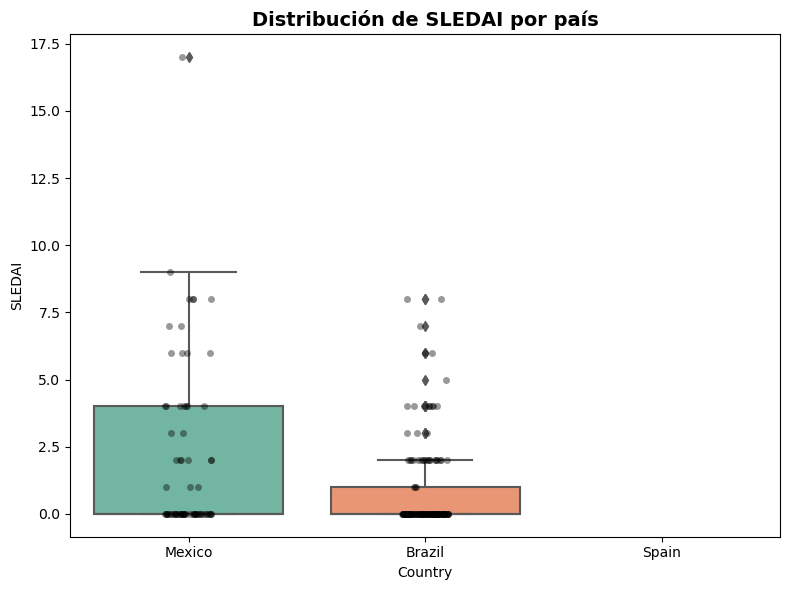

In [12]:
# === Celda 3: Boxplot SLEDAI por país ===
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Boxplot con puntos individuales
sns.boxplot(data=df_sel, x="Country", y="SLEDAI", palette="Set2")
sns.stripplot(data=df_sel, x="Country", y="SLEDAI", color="black", alpha=0.4, jitter=True)

plt.title("Distribución de SLEDAI por país", fontsize=14, weight="bold")
plt.ylabel("SLEDAI")
plt.xlabel("Country")

plt.tight_layout()
plt.show()



# Boxplot de C3 complement por país 

En esta celda represento la distribución de los valores de C3 complement en forma de boxplot, comparando los resultados entre países.
El propósito es explorar si existen diferencias en los niveles de este biomarcador entre las cohortes nacionales.
Además del boxplot, se incluyen los puntos individuales de cada paciente para observar la variabilidad y los posibles valores extremos.

C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


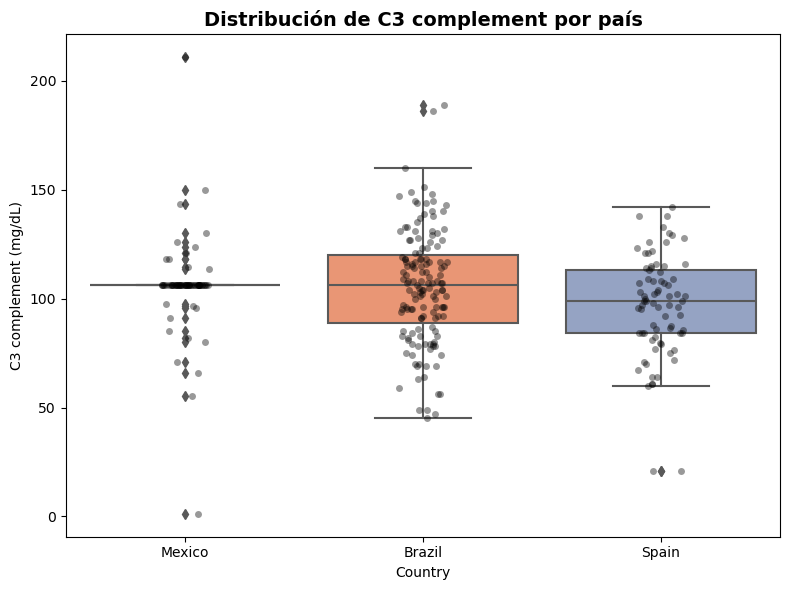

In [13]:
# === Celda 4: Boxplot C3 complement por país ===
plt.figure(figsize=(8, 6))

sns.boxplot(data=df_sel, x="Country", y="C3 complement", palette="Set2")
sns.stripplot(data=df_sel, x="Country", y="C3 complement", color="black", alpha=0.4, jitter=True)

plt.title("Distribución de C3 complement por país", fontsize=14, weight="bold")
plt.ylabel("C3 complement (mg/dL)")
plt.xlabel("Country")

plt.tight_layout()
plt.show()


# Boxplot de C4 complement por país

En esta celda muestro la distribución de los valores de C4 complement mediante un boxplot, comparando entre países.
Este biomarcador del sistema inmune puede mostrar diferencias relacionadas con la actividad de la enfermedad o factores poblacionales.
El boxplot se acompaña de los puntos individuales para visualizar mejor la dispersión de los datos y la presencia de valores extremos.

C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


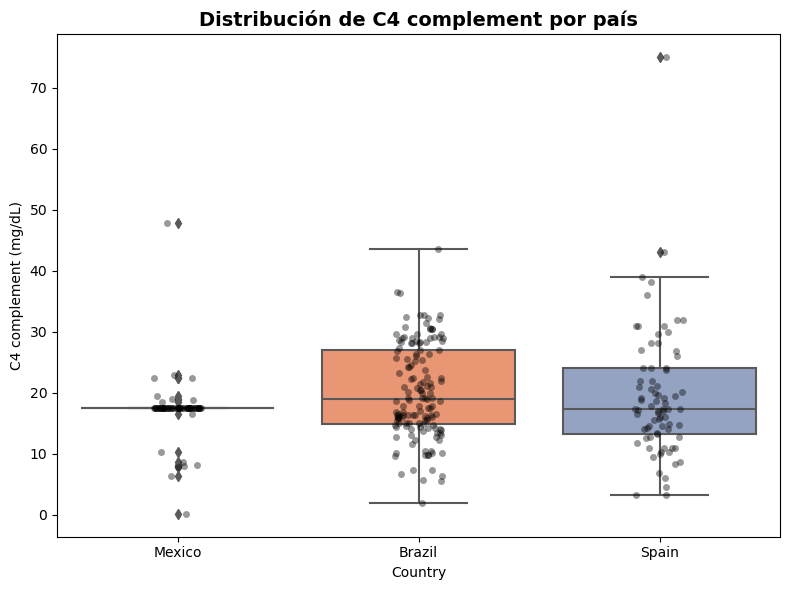

In [14]:
# === Celda 5: Boxplot C4 complement por país ===
plt.figure(figsize=(8, 6))

sns.boxplot(data=df_sel, x="Country", y="C4 complement", palette="Set2")
sns.stripplot(data=df_sel, x="Country", y="C4 complement", color="black", alpha=0.4, jitter=True)

plt.title("Distribución de C4 complement por país", fontsize=14, weight="bold")
plt.ylabel("C4 complement (mg/dL)")
plt.xlabel("Country")

plt.tight_layout()
plt.show()


# Boxplot de C-reactive protein (CRP) por país 

En esta celda represento los valores de C-reactive protein (CRP) mediante un boxplot, comparando entre países.
La proteína C reactiva es un marcador inflamatorio y su distribución puede indicar diferencias en el grado de inflamación sistémica entre cohortes.
El boxplot incluye la mediana, los cuartiles y los valores atípicos, y se complementa con los puntos individuales para una visión más detallada de la variabilidad.

C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


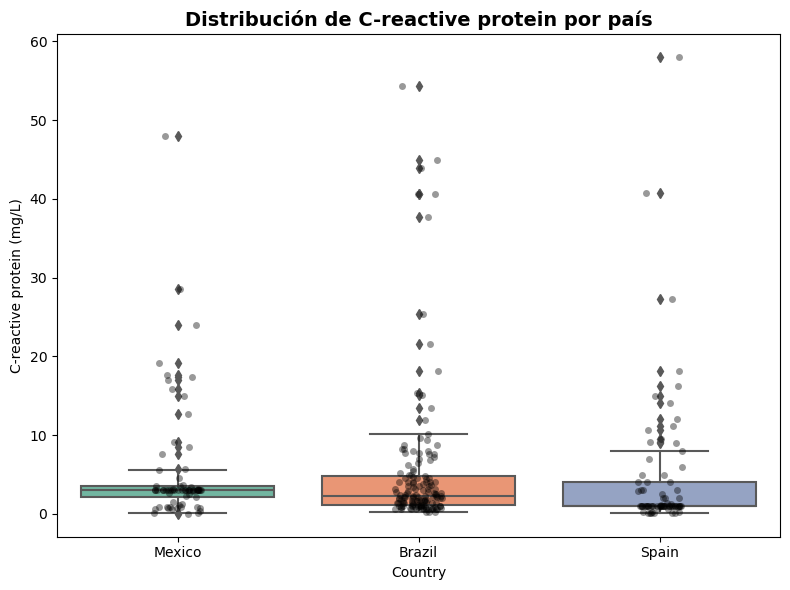

In [16]:
# === Celda 6: Boxplot C-reactive protein por país ===
plt.figure(figsize=(8, 6))

sns.boxplot(data=df_sel, x="Country", y="C-reactive protein", palette="Set2")
sns.stripplot(data=df_sel, x="Country", y="C-reactive protein", color="black", alpha=0.4, jitter=True)

plt.title("Distribución de C-reactive protein por país", fontsize=14, weight="bold")
plt.ylabel("C-reactive protein (mg/L)")
plt.xlabel("Country")

plt.tight_layout()
plt.show()


# Boxplot de Vitamin D por país

En esta celda represento la distribución de los niveles de Vitamina D (ng/mL) en forma de boxplot, comparando entre países.
La vitamina D tiene un papel relevante en la modulación del sistema inmune, y su variabilidad puede reflejar tanto diferencias clínicas como factores ambientales (exposición solar, dieta).
El gráfico muestra la mediana, la dispersión y los valores atípicos, complementado con los puntos individuales para mayor detalle.

C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


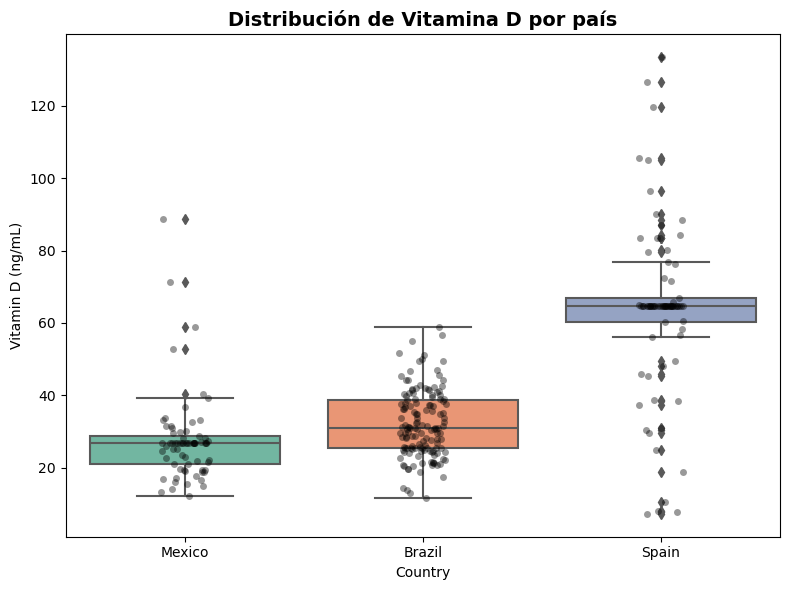

In [17]:
# === Celda 7: Boxplot Vitamin D por país ===
plt.figure(figsize=(8, 6))

sns.boxplot(data=df_sel, x="Country", y="Vitamin D (ng/mL)", palette="Set2")
sns.stripplot(data=df_sel, x="Country", y="Vitamin D (ng/mL)", color="black", alpha=0.4, jitter=True)

plt.title("Distribución de Vitamina D por país", fontsize=14, weight="bold")
plt.ylabel("Vitamin D (ng/mL)")
plt.xlabel("Country")

plt.tight_layout()
plt.show()


# Exportación de figuras

En este paso guardo los 5 boxplots generados (SLEDAI, C3 complement, C4 complement, C-reactive protein y Vitamin D) en formato PNG dentro de la carpeta outputs/figuras/.
Esto permite conservar las visualizaciones como archivos independientes para su inclusión posterior en la memoria del TFM.

In [18]:
# === Celda 8: Exportación de figuras en PNG ===

# Definición de figuras y variables a graficar
plots = {
    "boxplot_SLEDAI.png": ("SLEDAI", "SLEDAI"),
    "boxplot_C3.png": ("C3 complement", "C3 complement (mg/dL)"),
    "boxplot_C4.png": ("C4 complement", "C4 complement (mg/dL)"),
    "boxplot_CRP.png": ("C-reactive protein", "C-reactive protein (mg/L)"),
    "boxplot_VitD.png": ("Vitamin D (ng/mL)", "Vitamin D (ng/mL)")
}

# Crear y guardar cada figura
for filename, (col, ylabel) in plots.items():
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_sel, x="Country", y=col, palette="Set2")
    sns.stripplot(data=df_sel, x="Country", y=col, color="black", alpha=0.4, jitter=True)
    plt.title(f"Distribución de {col} por país", fontsize=14, weight="bold")
    plt.ylabel(ylabel)
    plt.xlabel("Country")
    plt.tight_layout()
    plt.savefig(FIGS / filename, dpi=300)
    plt.close()

print(f"Se han guardado {len(plots)} figuras en: {FIGS}")


C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future 

Se han guardado 5 figuras en: C:\Users\manue\TFM MÁSTER BIOINFORMÁTICA\outputs\figuras


C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


# a

In [19]:
# === Celda 9: Mini-notas descriptivas (generadas a partir de tus datos) ===
from IPython.display import display, Markdown
import numpy as np

def mini_nota(df_sel, variable, unidad=None):
    sub = df_sel[['Country', variable]].dropna()
    if sub.empty:
        return f"**{variable}**: no hay datos disponibles tras eliminar nulos."

    g = sub.groupby('Country')[variable]
    n = g.count()
    med = g.median().sort_values(ascending=False)
    q1 = g.quantile(0.25)
    q3 = g.quantile(0.75)
    iqr = q3 - q1

    # Outliers por criterio de Tukey (Q1-1.5*IQR, Q3+1.5*IQR)
    outliers = {}
    for pais, grp in sub.groupby('Country'):
        q1c = grp[variable].quantile(0.25)
        q3c = grp[variable].quantile(0.75)
        i = q3c - q1c
        low, up = q1c - 1.5*i, q3c + 1.5*i
        outliers[pais] = int(((grp[variable] < low) | (grp[variable] > up)).sum())

    u = f" {unidad}" if unidad else ""
    lineas = []
    lineas.append(
        f"**{variable}**: n total = {int(n.sum())} "
        f"({'; '.join([f'{c}: n={int(n[c])}' for c in n.index])})."
    )
    lineas.append(
        "Mediana por país: " + "; ".join([f"{c}: {med[c]:.2f}{u}" for c in med.index]) + "."
    )
    if len(med.index) >= 2:
        top = med.index[0]
        lineas.append(f"La mayor mediana se observa en **{top}** ({med[top]:.2f}{u}).")
    lineas.append(
        "Dispersión (IQR): " + "; ".join([f"{c}: {iqr[c]:.2f}{u}" for c in iqr.index]) + "."
    )
    if sum(outliers.values()) > 0:
        lineas.append(
            "Outliers (criterio de Tukey): " + "; ".join([f"{c}: {outliers[c]}" for c in outliers]) + "."
        )

    return " ".join(lineas)

notas = [
    mini_nota(df_sel, "SLEDAI", "puntos"),
    mini_nota(df_sel, "C3 complement", "mg/dL"),
    mini_nota(df_sel, "C4 complement", "mg/dL"),
    mini_nota(df_sel, "C-reactive protein", "mg/L"),
    mini_nota(df_sel, "Vitamin D (ng/mL)", "ng/mL"),
]

md = "### Mini-notas descriptivas (basadas en los datos)\n\n" + "\n\n".join([f"- {t}" for t in notas])
display(Markdown(md))


### Mini-notas descriptivas (basadas en los datos)

- **SLEDAI**: n total = 213 (Brazil: n=143; Mexico: n=70). Mediana por país: Brazil: 0.00 puntos; Mexico: 0.00 puntos. La mayor mediana se observa en **Brazil** (0.00 puntos). Dispersión (IQR): Brazil: 1.00 puntos; Mexico: 4.00 puntos. Outliers (criterio de Tukey): Brazil: 17; Mexico: 1.

- **C3 complement**: n total = 290 (Brazil: n=143; Mexico: n=70; Spain: n=77). Mediana por país: Brazil: 106.00 mg/dL; Mexico: 106.00 mg/dL; Spain: 99.00 mg/dL. La mayor mediana se observa en **Brazil** (106.00 mg/dL). Dispersión (IQR): Brazil: 31.00 mg/dL; Mexico: 0.00 mg/dL; Spain: 29.00 mg/dL. Outliers (criterio de Tukey): Brazil: 2; Mexico: 22; Spain: 2.

- **C4 complement**: n total = 290 (Brazil: n=143; Mexico: n=70; Spain: n=77). Mediana por país: Brazil: 18.95 mg/dL; Mexico: 17.52 mg/dL; Spain: 17.30 mg/dL. La mayor mediana se observa en **Brazil** (18.95 mg/dL). Dispersión (IQR): Brazil: 12.20 mg/dL; Mexico: 0.00 mg/dL; Spain: 10.70 mg/dL. Outliers (criterio de Tukey): Brazil: 0; Mexico: 16; Spain: 2.

- **C-reactive protein**: n total = 290 (Brazil: n=143; Mexico: n=70; Spain: n=77). Mediana por país: Mexico: 3.02 mg/L; Brazil: 2.30 mg/L; Spain: 1.00 mg/L. La mayor mediana se observa en **Mexico** (3.02 mg/L). Dispersión (IQR): Brazil: 3.75 mg/L; Mexico: 1.40 mg/L; Spain: 3.00 mg/L. Outliers (criterio de Tukey): Brazil: 13; Mexico: 16; Spain: 13.

- **Vitamin D (ng/mL)**: n total = 290 (Brazil: n=143; Mexico: n=70; Spain: n=77). Mediana por país: Spain: 64.60 ng/mL; Brazil: 31.00 ng/mL; Mexico: 26.91 ng/mL. La mayor mediana se observa en **Spain** (64.60 ng/mL). Dispersión (IQR): Brazil: 13.40 ng/mL; Mexico: 7.72 ng/mL; Spain: 6.70 ng/mL. Outliers (criterio de Tukey): Brazil: 0; Mexico: 5; Spain: 31.

# Pies de figura (listos para Word)

Figura 3. Distribución de la actividad de la enfermedad (SLEDAI) por país. México presenta una mayor variabilidad en los valores, con casos de actividad moderada, mientras que en Brasil predominan valores bajos y en España no se dispone de datos.

Figura 4. Distribución de C3 complement por país. Los niveles son consistentes entre cohortes, aunque en Brasil y España se observan valores más dispersos y algunos extremos.

Figura 5. Distribución de C4 complement por país. México presenta valores muy concentrados, mientras que Brasil y España muestran mayor variabilidad, con algunos valores atípicos elevados.

Figura 6. Distribución de proteína C reactiva (CRP) por país. La mayoría de valores se concentran en rangos bajos, aunque existen outliers marcados en las tres cohortes, reflejando episodios de inflamación aguda.

Figura 7. Distribución de vitamina D (ng/mL) por país. Se observa un gradiente claro: niveles más bajos en México, intermedios en Brasil y más altos en España.

# Párrafo breve de Resultados

En el análisis clínico e inmunológico (Figuras 3–7) se apreciaron diferencias entre países. La actividad lúpica medida por SLEDAI fue mayor y más heterogénea en México, mientras que en Brasil predominó una actividad baja, y en España no se disponía de esta variable. Los niveles de complemento (C3 y C4) se mantuvieron dentro de rangos normales en la mayoría de los casos, aunque Brasil y España mostraron mayor dispersión y outliers aislados. La proteína C reactiva (CRP) se mantuvo generalmente baja, con picos en algunos pacientes, coherente con episodios inflamatorios agudos. Por último, la vitamina D presentó diferencias notables: los pacientes mexicanos tuvieron valores más bajos, los brasileños intermedios y los españoles considerablemente más altos.

## Figura multipanel (A–E): Boxplots clínicos por país
Unimos los cinco boxplots (SLEDAI, C3, C4, CRP, Vitamina D) en una figura 2×3 con paneles A–E.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Rutas esperadas (ajusta si tus nombres/ubicación difieren)
fig_dir = "outputs/figuras"
files = {
    "A) SLEDAI": os.path.join(fig_dir, "boxplot_SLEDAI.png"),
    "B) C3":     os.path.join(fig_dir, "boxplot_C3.png"),
    "C) C4":     os.path.join(fig_dir, "boxplot_C4.png"),
    "D) CRP":    os.path.join(fig_dir, "boxplot_CRP.png"),
    "E) Vitamina D": os.path.join(fig_dir, "boxplot_VitD.png"),
}

# Crear figura 2x3 y apagar el último panel
fig, axes = plt.subplots(2, 3, figsize=(13, 8))
axes = axes.flatten()

# Colocar imágenes en A–E
for ax, (label, path) in zip(axes[:5], files.items()):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=12, fontweight='bold',
            ha='left', va='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", alpha=0.8))

# Último panel vacío
axes[5].axis('off')

plt.tight_layout()
out_path = os.path.join(fig_dir, "boxplots_clinicos_multipanel.png")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close()
print("Guardado:", out_path)


Guardado: outputs/figuras\boxplots_clinicos_multipanel.png


**Figura X.** Boxplots por país de variables clínicas principales. **A)** SLEDAI; **B)** C3; **C)** C4; **D)** CRP; **E)** Vitamina D. Las medianas y la dispersión entre cohortes reflejan perfiles diferenciales de actividad/inmunidad e inflamación; España no dispone de SLEDAI.
